In [1]:
import numpy as np
import matplotlib.pyplot as plt
import re
from matplotlib.patches import Circle
import mpl_toolkits.mplot3d.art3d as art3d

In [2]:
file = open(".\\CubeTest.txt", 'r')
file_text = file.read()

In [3]:
file_text = file_text.replace('\n', '')
file_list = re.split('\[|\]',file_text)

In [4]:
toggle = False

vecs = []
for k in file_list:
    if k == '':
        toggle = not toggle
        continue
    elif k == ', ':
        continue
    if toggle:
        l = re.split(', ', k)
        vec = []
        for m in l:
            num = int(m)
            vec.append(num)
        vecs.append(vec)

In [5]:
cubits = []
cubit = []

j = 0
for i in vecs:
    j += 1
    if j % 4 == 1:
        cubits.append(cubit)
        cubit = []
        
    cubit.append(i)
cubits.append(cubit)
cubits.pop(0)
cubits = np.array(cubits)

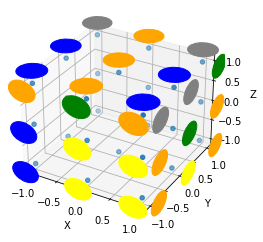

In [6]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')


# the Blue/Green Vector in the 2nd column (x-axis blue positive)
# the Red/Orange Vector in the 3rd column (y-axis red positive)
# the Yellow/White Vector in the 4th column (z-axis yellow positive)

def color(v, iden):
    idx = np.argwhere(v[:,iden])[0,0]
    if idx == 0:
        if v[idx,iden] == -1:
            return 'green'
        else:
            return 'blue'
    elif idx == 1:
        if v[idx,iden] == -1:
            return 'orange'
        else:
            return 'red'
    elif idx == 2:
        if v[idx,iden] == -1:
            return 'grey'
        else:
            return 'yellow'
    
    
for cubit in cubits:
    x, y, z = cubit[0]
    
    if x == 1:
        p = Circle((y, z), 0.25, color=color(cubit[1:], 0))
        ax.add_patch(p)
        art3d.pathpatch_2d_to_3d(p, z=x+0.3, zdir="x")
    if y == -1:
        p = Circle((x, z), 0.25, color=color(-1*cubit[1:], 1))
        ax.add_patch(p)
        art3d.pathpatch_2d_to_3d(p, z=y-0.3, zdir="y")
    if z == 1: 
        p = Circle((x, y), 0.25, color=color(cubit[1:], 2))
        ax.add_patch(p)
        art3d.pathpatch_2d_to_3d(p, z=z+0.3, zdir="z")

ax.scatter(cubits[:,:1,0],cubits[:,:1,1],cubits[:,:1,2])
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()